### Estudo dos pacientes com obsidade
O objetivo desse notebook é realizar uma análise em torno da obesidade dos pacientes que realizaram exames CK (CPK).

Para isso são realizados os seguintes passos:
1. Calculo da média das medições para cada paciente, visto que foram feitas medições em várias datas para cada paciente
2. Estratificação dos dados em pacientes com obesidade (BMI >= 30) e sem obesidade

Após essas etapas são gerados 2 gráficos: um gráfico representando a porcentagem de pacientes obesos vs não obesos e outro gráfico que mostra a distribuição do BMI (IMC) nos pacientes analisados.


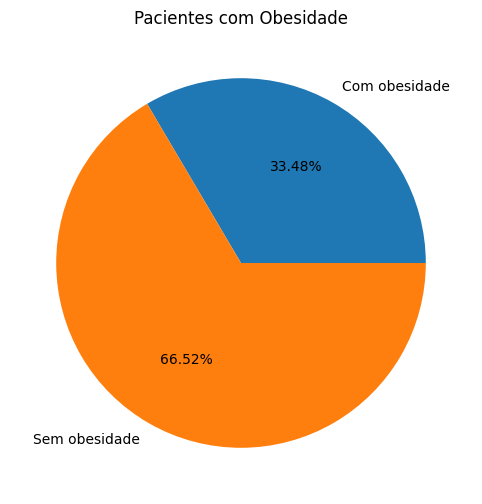

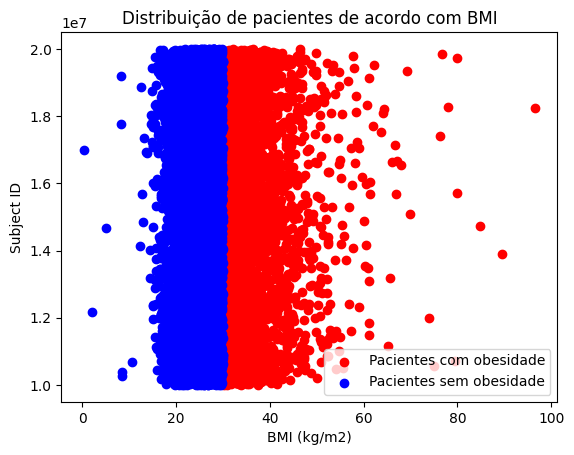

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

bmi = pd.read_csv('../data/processed/bmi_norm.csv')

# Calculando a média das medições para cada paciente, visto que foram feitas medições em várias datas para cada paciente
bmi_av = bmi.groupby(['subject_id'])['result_value'].mean().reset_index()

# Separando os dados em pacientes com obesidade (BMI >= 30) e sem obesidade
bmi_ob = bmi_av[bmi_av['result_value'] >= 30]
bmi_other = bmi_av[bmi_av['result_value'] < 30]

ob_count = len(bmi_ob)
other_count = len(bmi_other)

plt.figure(figsize=(8,6))
plt.pie([ob_count, other_count], labels=['Com obesidade', 'Sem obesidade'], autopct='%1.2f%%')
plt.title('Pacientes com Obesidade')
plt.show()

plt.scatter(bmi_ob['result_value'], bmi_ob['subject_id'], color='red', label='Pacientes com obesidade')
plt.scatter(bmi_other['result_value'], bmi_other['subject_id'], color='blue', label='Pacientes sem obesidade')

plt.xlabel('BMI (kg/m2)')
plt.ylabel('Subject ID')
plt.legend()
plt.title('Distribuição de pacientes de acordo com BMI')
plt.show()

### Analise BMI (IMC) vs Valores de CK

O objetivo desse processamento é gerar gráficos que correlacionam os valores de BMI (IMC) com valores medidos nos exames de CK (CKP)

Para isso os seguintes passos foram tomados:
1. Calculo da média das medições de CK para cada paciente, visto que foram feitas medições em várias datas para cada paciente
2. Estraficação das medições de CK para pacientes obesos e não obesos


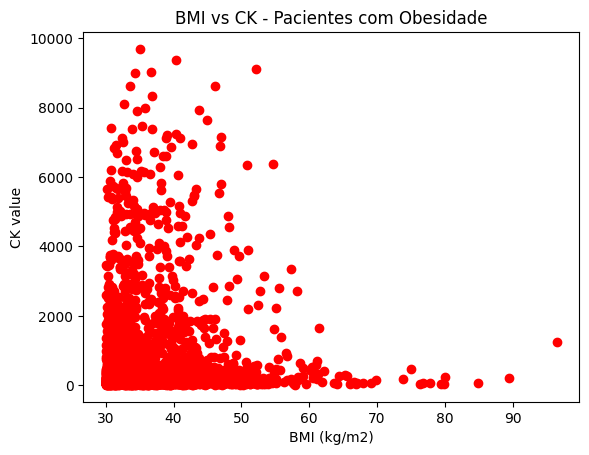

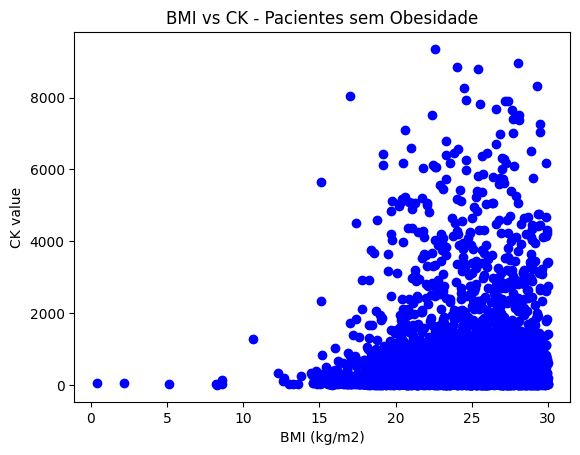

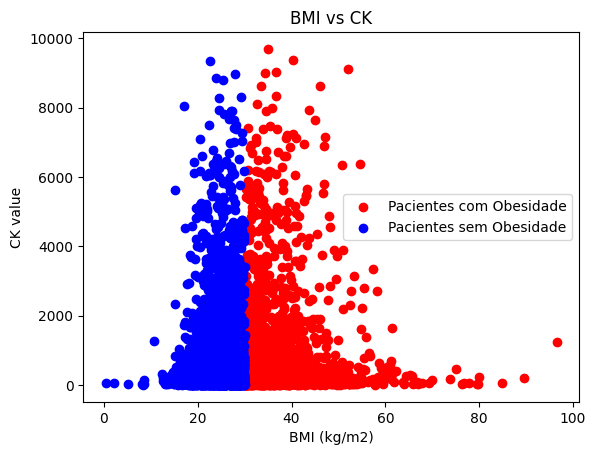

In [3]:
ck = pd.read_csv('../data/processed/ck_norm.csv')

ck_av = ck.groupby(['subject_id'])['valuenum'].mean().reset_index()

ck_ob = ck_av[ck_av['subject_id'].isin(bmi_ob['subject_id'])]
ck_other = ck_av[ck_av['subject_id'].isin(bmi_other['subject_id'])]
# Como há elementos em bmi_ob e bmi_other que não estão em ck_ob e ck_other, retiramos eles para a criaçao do gráfico
bmi_ob_redux = bmi_ob[bmi_ob['subject_id'].isin(ck_ob['subject_id'])]
bmi_other_redux = bmi_other[bmi_other['subject_id'].isin(ck_other['subject_id'])]

plt.scatter(bmi_ob_redux['result_value'], ck_ob['valuenum'], color='red')
plt.xlabel('BMI (kg/m2)')
plt.ylabel('CK value')
plt.title('BMI vs CK - Pacientes com Obesidade')
plt.show()

plt.scatter(bmi_other_redux['result_value'], ck_other['valuenum'], color='blue')
plt.xlabel('BMI (kg/m2)')
plt.ylabel('CK value')
plt.title('BMI vs CK - Pacientes sem Obesidade')
plt.show()

plt.scatter(bmi_ob_redux['result_value'], ck_ob['valuenum'], color='red', label='Pacientes com Obesidade')
plt.scatter(bmi_other_redux['result_value'], ck_other['valuenum'], color='blue', label='Pacientes sem Obesidade')

plt.xlabel('BMI (kg/m2)')
plt.ylabel('CK value')
plt.title('BMI vs CK')
plt.legend()
plt.show()